## KNOW YOUR FRUIT
#### Project by:
#####                Bhavana Muralidharan
#####                Monisha Javali Veerabhadran
#####                Naishad Sure

In [2]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

E:\Python\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    fruit_files = np.array(data['filenames'])
    print(fruit_files)
    fruit_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return fruit_files, fruit_targets

In [4]:
train_files, train_targets = load_dataset('Fruits/train/')

['Fruits/train/tomato_images\\31.jpg'
 'Fruits/train/apricot_images\\25.jpg'
 'Fruits/train/strawberry_images\\17.jpg'
 'Fruits/train/lime_images\\8.jpg' 'Fruits/train/apricot_images\\4.jpg'
 'Fruits/train/avocado_images\\16.jpg'
 'Fruits/train/pomegranate_images\\7.jpg'
 'Fruits/train/kiwifruit_images\\4.jpg'
 'Fruits/train/coconut_images\\7.jpg'
 'Fruits/train/passionfruit_images\\17.jpg'
 'Fruits/train/kiwifruit_images\\7.jpg'
 'Fruits/train/pomegranate_images\\26.jpg'
 'Fruits/train/cherry_images\\22.jpg' 'Fruits/train/mango_images\\23.jpg'
 'Fruits/train/pineapple_images\\6.jpg'
 'Fruits/train/watermelon_images\\10.jpg'
 'Fruits/train/pineapple_images\\17.jpg'
 'Fruits/train/olive_images\\6.jpg' 'Fruits/train/plum_images\\25.jpg'
 'Fruits/train/strawberry_images\\36.jpg'
 'Fruits/train/apricot_images\\20.jpg' 'Fruits/train/grape_images\\20.jpg'
 'Fruits/train/grape_images\\4.jpg' 'Fruits/train/mango_images\\16.jpg'
 'Fruits/train/cherry_images\\4.jpg'
 'Fruits/train/raspberry_imag

In [5]:
train_targets

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Importing Libraries

In [6]:
import os
import sys
import datetime
import glob as glob
import numpy as np
import cv2
import keras
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.optimizers import SGD
import tensorflow
from scipy.interpolate import spline
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
keras.__version__

'2.1.5'

In [8]:
tensorflow.__version__

'1.6.0'

In [9]:
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest')

#### Reading images from the dataset

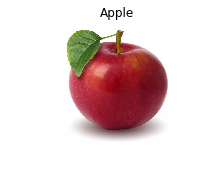

In [10]:
img = load_img('Fruits/train/apple_images/1.jpg')
plt.figure(figsize = (3,3))
plt.imshow(img)
plt.axis('off')
plt.title('Apple')
plt.show()

In [11]:
x = img_to_array(img)
x2 = x.reshape((1,) + x.shape)

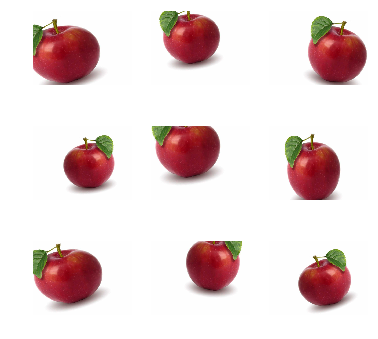

In [12]:
i = 0
fig = plt.figure(figsize = (6,6))
plt.title('Pre-processed')
for batch in datagen.flow(x2, batch_size = 1):
    i += 1
    if i > 9:
        break
    temp = batch.reshape(x.shape)
    plt.subplot(3, 3, i)
    plt.imshow(temp.astype('uint8'))
    plt.axis('off')
plt.show()

### Reading the calorie data

In [13]:
fruit_dict = {0:'Apple', 1:'Acerola',
                2:'Apricot', 3:'Avocado', 4:'Banana',
                5:'Blackberry', 6:'Blueberry', 7:'Cantaloupe', 8:'Cherry',9:'Coconut', 10:'Fig', 
              11:'Grapefruit', 12:'Grape', 13:'Guava', 14:'Kiwifruit', 15:'Lemon', 16:'Lime'
             , 17:'Mango', 18:'Olive', 19:'Orange', 20:'Passionfruit', 21:'Peach', 22:'Pineapple'
             , 23:'Plum', 24:'Pomegranate', 25:'Raspberry', 26:'Strawberry', 27:'Tomato', 28:'Watermelon'}

In [14]:
cals_dict = {'0':27, '1':11.5,
                '2':24, '3':80, '4':45,
                '5':22, '6':28, '7':17, '8':32,'9':177, '10':37, 
              '11':16, '12':34, '13':34, '14':30, '15':12, '16':18
             , '17':32, '18':58, '19':15, '20':48.6, '21':20, '22':24
             , '23':30, '24':34, '25':27, '26':16, '27':27, '28':15}

In [15]:
def fruitclass_conv(s):
    return fruit_dict[s]

In [16]:
# default settings
img_width, img_height = 224, 224

train_dir = 'Fruits/train'
validate_dir = 'Fruits/validate'
nb_epochs = 10
batch_size = 32
nb_classes = len(glob.glob(train_dir + '/*'))
print(nb_classes)

29


### An OS walk through directories

In [17]:
# get number of images in training directory
nb_train_samples = 0
for r, dirs, files in os.walk(train_dir):
    for dr in dirs:
        nb_train_samples += len(glob.glob(os.path.join(r , dr + "/*")))
print(nb_train_samples)

606


In [18]:
# get number of images in validation directory
nb_validate_samples = 0
for r, dirs, files in os.walk(validate_dir):
    for dr in dirs:
        nb_validate_samples += len(glob.glob(os.path.join(r, dr + "/*")))
print(nb_validate_samples)

379


In [19]:
# data pre-processing for training
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [20]:
# data pre-processing for validation
validate_datagen =  ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    fill_mode = 'nearest',
    horizontal_flip = True)

In [21]:
# generate and store training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 606 images belonging to 29 classes.


In [22]:
# generate and store validation data
validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size = (img_width, img_height),
    batch_size = batch_size)

Found 379 images belonging to 29 classes.


### Using the VGG16

In [168]:
# set up transfer learning on pre-trained ImageNet VGG16 model - remove fully connected layer and replace
# with softmax for classifying 10 classes
vgg16_model = VGG16(weights = 'imagenet', include_top = False)
x = vgg16_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(nb_classes, activation = 'softmax')(x)
model = Model(input = vgg16_model.input, output = predictions)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  


### Fine tuning the model

In [169]:
# freeze all layers of the pre-trained model
for layer in vgg16_model.layers:
    layer.trainable = False

### Compiling the model

In [170]:
# compile the new model using a RMSProp optimizer
model.compile(optimizer = 'rmsprop',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

### Training the model

In [ ]:
# fit the model, log the results and the training time
now = datetime.datetime.now
t = now()
transfer_learning_history = model.fit_generator(
    train_generator,
    nb_epoch = nb_epochs,
    samples_per_epoch = nb_train_samples,
    validation_data = validate_generator,
    nb_val_samples = nb_validate_samples,
    class_weight='auto')
print('Training time: %s' % (now() - t))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., class_weight="auto", steps_per_epoch=18, epochs=10, validation_steps=379)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
17/18 [===========================>..] - ETA: 15s - loss: 3.2261 - acc: 0.1452

In [102]:
# evaluate the performance the new model and report the results
score = model.evaluate_generator(validate_generator, nb_validate_samples/batch_size)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.511524140835
Test Accuracy: 0.666666686535


### Plots of  Accuracy and Loss

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


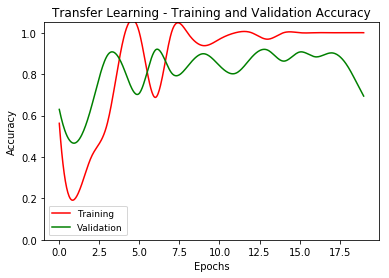

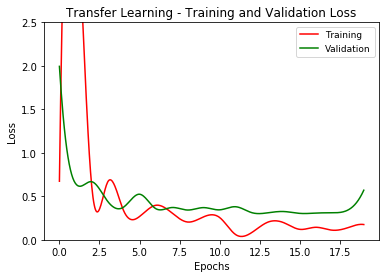

In [130]:
xfer_acc = transfer_learning_history.history['acc']
val_acc = transfer_learning_history.history['val_acc']
xfer_loss = transfer_learning_history.history['loss']
val_loss = transfer_learning_history.history['val_loss']
epochs = range(len(xfer_acc))

x = np.array(epochs)
y = np.array(xfer_acc)
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = spline(x, y, x_smooth)
plt.plot(x_smooth, y_smooth, 'r-', label = 'Training')

x1 = np.array(epochs)
y1 = np.array(val_acc)
x1_smooth = np.linspace(x1.min(), x1.max(), 500)
y1_smooth = spline(x1, y1, x1_smooth)

plt.plot(x1_smooth, y1_smooth, 'g-', label = 'Validation')
plt.title('Transfer Learning - Training and Validation Accuracy')
plt.legend(loc = 'lower left', fontsize = 9)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1.05)

plt.figure()
x = np.array(epochs)
y = np.array(xfer_loss)
x_smooth = np.linspace(x.min(), x.max(), 500)
y_smooth = spline(x, y, x_smooth)
plt.plot(x_smooth, y_smooth, 'r-', label = 'Training')

x1 = np.array(epochs)
y1 = np.array(val_loss)
x1_smooth = np.linspace(x1.min(), x1.max(), 500)
y1_smooth = spline(x1, y1, x1_smooth)

plt.plot(x1_smooth, y1_smooth, 'g-', label = 'Validation')
plt.title('Transfer Learning - Training and Validation Loss')
plt.legend(loc = 'upper right', fontsize = 9)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0,2.5)
plt.show()

In [105]:
validate_generator.total_batches_seen

562

In [67]:
num_images = len(glob.glob("Fruits/test/*.jpg"))

In [68]:
predict_files = glob.glob("Fruits/test/*.jpg")

In [70]:
im = cv2.imread(predict_files[0])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (256, 256)).astype(np.float32)
im = np.expand_dims(im, axis = 0)/255

In [71]:
predictor, image_id, cals = [], [], []
for i in predict_files:
    im = cv2.imread(i)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (256, 256)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    outcome = [np.argmax(model.predict(im))]
    predictor.extend(list(outcome))
    image_id.extend([i.rsplit("\\")[-1]])

In [72]:
cals = []
for  v in range(len(predictor)):    
    cals.append(cals_dict[str(predictor[v])])
    
classes_pred = []
for m in range(len(predictor)):
    classes_pred.append(fruit_dict[predictor[m]])

In [73]:
final = pd.DataFrame()
final["id"] = image_id
final["Fruit"] = classes_pred
final["Calories(50gm)"] = cals
final.head(num_images)

,id,Fruit,Calories(50gm)
0,acerola_30.jpg,Tomato,27.0
1,acerola_46.jpg,Tomato,27.0
2,apple_2.jpg,Acerola,11.5
3,apple_28.jpg,Acerola,11.5
4,apple_3.jpg,Acerola,11.5
5,apricot_35.jpg,Acerola,11.5
6,apricot_5.jpg,Acerola,11.5
7,avocado_19.jpg,Avocado,80.0
8,avocado_34.jpg,Peach,20.0
9,avocado_52.jpg,Peach,20.0


In [56]:
classes = train_generator.class_indices
classes = {value : key for key, value in classes.items()}

In [57]:
classes_display = []
for k in final["Fruit"]:
    fruits = k
    for key, val in fruit_dict.items():
        if fruits == val:
            classes_display.append(key)

In [58]:
df = pd.DataFrame()
df["Fruitsss"] = classes_display
final["Fruit"] = df["Fruitsss"].apply(lambda x: classes[x])
final.head(num_images)

,id,Fruit,Calories(50gm)
0,acerola_30.jpg,tomato_images,27.0
1,acerola_46.jpg,tomato_images,27.0
2,apple_2.jpg,apple_images,11.5
3,apple_28.jpg,apple_images,11.5
4,apple_3.jpg,apple_images,11.5
5,apricot_35.jpg,apple_images,11.5
6,apricot_5.jpg,apple_images,11.5
7,avocado_19.jpg,avocado_images,80.0
8,avocado_34.jpg,peach_images,20.0
9,avocado_52.jpg,peach_images,20.0


In [59]:
final.to_csv("csv/fruits_with_pretrained_vgg16_model_t2_test.csv", index = False)

In [60]:
for i, layer in enumerate(model.layers):
   print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv2
3 block1_pool
4 block2_conv1
5 block2_conv2
6 block2_pool
7 block3_conv1
8 block3_conv2
9 block3_conv3
10 block3_pool
11 block4_conv1
12 block4_conv2
13 block4_conv3
14 block4_pool
15 block5_conv1
16 block5_conv2
17 block5_conv3
18 block5_pool
19 global_average_pooling2d_1
20 dense_1
21 dense_2
22 dense_3


In [38]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

### Fine Tuning the model

In [131]:
# Step 1 - Set up fine tuning on pre-trained ImageNet VGG16 model - train all layers
for layer in model.layers:
    layer.trainable = True
    
# Step 2 - Compile the revised model using SGD optimizer with a learing rate of 0.0001 and a momentum of 0.9
model.compile(optimizer = SGD(lr = 0.0001, momentum=0.9), 
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'])

# Step 3 - Fit the revised model, log the results and the training time
now = datetime.datetime.now
t = now()
fine_tuning_history = model.fit_generator(
    train_generator,
    nb_epoch = nb_epochs,
    samples_per_epoch = nb_train_samples,
    validation_data = validate_generator,
    nb_val_samples = nb_validate_samples,
    class_weight='auto')
print('Training time: %s' % (now() - t))

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., class_weight="auto", steps_per_epoch=1, epochs=20, validation_steps=27)`


Epoch 1/20
1/1 [==============================] - 353s 353s/step - loss: 0.2165 - acc: 0.8000 - val_loss: 0.5442 - val_acc: 0.7106
Epoch 2/20
1/1 [==============================] - 394s 394s/step - loss: 0.3553 - acc: 0.7812 - val_loss: 0.4490 - val_acc: 0.7942
Epoch 3/20
1/1 [==============================] - 353s 353s/step - loss: 0.6273 - acc: 0.6000 - val_loss: 0.3488 - val_acc: 0.9012
Epoch 4/20
1/1 [==============================] - 380s 380s/step - loss: 0.2020 - acc: 0.9375 - val_loss: 0.2939 - val_acc: 0.9150
Epoch 5/20
1/1 [==============================] - 341s 341s/step - loss: 0.1839 - acc: 1.0000 - val_loss: 0.2583 - val_acc: 0.9246
Epoch 6/20
1/1 [==============================] - 382s 382s/step - loss: 0.1111 - acc: 1.0000 - val_loss: 0.2493 - val_acc: 0.9259
Epoch 7/20
1/1 [==============================] - 335s 335s/step - loss: 0.1178 - acc: 1.0000 - val_loss: 0.2536 - val_acc: 0.9218
Epoch 8/20
1/1 [==============================] - 362s 362s/step - loss: 0.1008 - a

In [132]:
# evaluate the performance the new model and report the results
score = model.evaluate_generator(validate_generator, nb_validate_samples/batch_size)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.171098440886
Test Accuracy: 0.962962985039


In [133]:
# save fine-tuning model for offline prediction purposes
model.save('fruits_vgg16_model_ft2.h5')

### Plots of  Accuracy and Loss

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
  app.launch_new_instance()
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: DeprecationWarning: `spline` is deprecated!
spline is deprecated in scipy 0.19.0, use Bspline class instead.


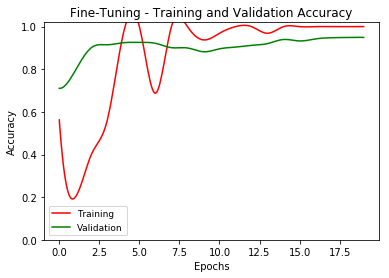

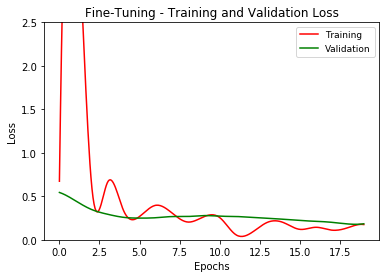

In [134]:
ft_acc = fine_tuning_history.history['acc']
val_acc = fine_tuning_history.history['val_acc']
ft_loss = fine_tuning_history.history['loss']
val_loss = fine_tuning_history.history['val_loss']
epochs = range(len(ft_acc))

x = np.array(epochs)
y = np.array(xfer_acc)
x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = spline(x, y, x_smooth)
plt.plot(x_smooth, y_smooth, 'r-', label = 'Training')

x1 = np.array(epochs)
y1 = np.array(val_acc)
x1_smooth = np.linspace(x1.min(), x1.max(), 300)
y1_smooth = spline(x1, y1, x1_smooth)

plt.plot(x1_smooth, y1_smooth, 'g-', label = 'Validation')
plt.title('Fine-Tuning - Training and Validation Accuracy')
plt.legend(loc = 'lower left', fontsize = 9)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0,1.02)

plt.figure()
x = np.array(epochs)
y = np.array(xfer_loss)
x_smooth = np.linspace(x.min(), x.max(), 300)
y_smooth = spline(x, y, x_smooth)
plt.plot(x_smooth, y_smooth, 'r-', label = 'Training')

x1 = np.array(epochs)
y1 = np.array(val_loss)
x1_smooth = np.linspace(x1.min(), x1.max(), 300)
y1_smooth = spline(x1, y1, x1_smooth)

plt.plot(x1_smooth, y1_smooth, 'g-', label = 'Validation')
plt.title('Fine-Tuning - Training and Validation Loss')
plt.legend(loc = 'upper right', fontsize = 9)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0, 2.5)
plt.show()

In [135]:
validate_generator.total_batches_seen


1124

In [136]:
predict_files = glob.glob("Fruits/test/*.jpg")

In [137]:
im = cv2.imread(predict_files[0])
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (256, 256)).astype(np.float32)
im = np.expand_dims(im, axis = 0)/255

In [138]:
predictor, image_id = [], []
for i in predict_files:
    im = cv2.imread(i)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (256, 256)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)
    outcome = [np.argmax(model.predict(im))]
    predictor.extend(list(outcome))
    image_id.extend([i.rsplit("\\")[-1]])

In [ ]:
cals = []
for  v in range(len(predictor)):    
    cals.append(cals_dict[str(predictor[v])])

classes_pred = []
for m in range(len(predictor)):
    classes_pred.append(fruit_dict[predictor[m]])

##### Since the model took long to run the below table represents the classification for 2 classes

In [139]:
final = pd.DataFrame()
final["id"] = image_id
final["Fruit"] = classes_pred
final["Calories(50gm)"] = cals
final.head(num_images)

,id,Fruit
0,apples/test/8.jpg,0
1,apples/test/9.jpg,0
2,apples/test/28.jpg,1
3,apples/test/29.jpg,1
4,apples/test/11.jpg,0
5,apples/test/10.jpg,0
6,apples/test/35.jpg,1
7,apples/test/34.jpg,1
8,apples/test/36.jpg,1
9,apples/test/37.jpg,1


In [140]:
classes = train_generator.class_indices
classes = {value : key for key, value in classes.items()}

In [141]:
final["Fruit"] = final["Fruit"].apply(lambda x: classes[x])
final.head(num_images)

,id,Fruit
0,apples/test/8.jpg,apple_images
1,apples/test/9.jpg,apple_images
2,apples/test/28.jpg,banana_images
3,apples/test/29.jpg,banana_images
4,apples/test/11.jpg,apple_images
5,apples/test/10.jpg,apple_images
6,apples/test/35.jpg,banana_images
7,apples/test/34.jpg,banana_images
8,apples/test/36.jpg,banana_images
9,apples/test/37.jpg,banana_images


In [142]:
final.to_csv("csv/fruits_validation_with_pretrained_vgg16_model_t2_test.csv", index = False)